# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

Уберём ворнинги, так как устал бороться с Depricated Warnings...

In [1]:
import warnings
warnings.filterwarnings("ignore")

Дисклеймер. 
Я не использовал пайпы в некоторых местах, так как в задании явно было сказано проводить обработку данных поэтапно. Я так и не понял смысла требовать поэтапную обработку и использование пайпов...

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
1,332,99,57,109,220,66,11,221,30,25,176,234,725,236,70,10,25,188,200
2,354,98,50,90,192,63,9,177,37,21,155,195,472,197,65,10,1,193,201
3,11,90,34,66,136,55,6,123,54,17,118,148,224,118,65,5,26,196,202
4,466,78,43,70,147,65,8,147,46,19,145,169,319,168,77,1,12,181,186
5,63,83,42,66,156,67,7,150,45,19,144,174,333,159,78,4,2,182,188
6,673,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203
7,674,92,37,80,180,67,8,154,43,19,129,180,353,144,69,6,9,190,195
8,615,88,34,69,152,57,5,138,48,18,122,158,284,120,62,9,29,204,210
9,59,85,39,68,119,52,5,128,53,18,135,148,241,142,75,8,8,182,187


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,415.790528,93.814208,44.932605,82.495446,169.786885,61.775956,8.628415,168.978142,40.790528,20.584699,148.249545,188.954463,439.854281,174.644809,72.112933,6.275046,12.593807,189.162113,195.938069
std,243.406223,8.209067,6.096323,15.143549,32.684068,7.854219,4.539003,32.244327,7.575040,2.520468,14.284314,30.279593,171.551669,32.398853,6.976106,4.898135,8.916525,6.036170,7.251969
min,0.000000,73.000000,33.000000,47.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,134.000000,193.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,88.000000,40.000000,71.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,322.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,414.000000,93.000000,45.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,634.000000,99.000000,49.000000,96.000000,196.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,217.000000,584.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,261.000000,59.000000,28.000000,188.000000,287.000000,998.000000,268.000000,119.000000,22.000000,40.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [6]:
### YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [7]:
### YOUR CODE HERE

from sklearn.metrics import roc_curve, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer

# Make a f1 scorer for multiclass problem.
scoring = make_scorer(f1_score, average='weighted')

# Encode y_train and y_test.
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

#Define a classifier.
lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000)

#Define params over which the GridSearchCV will be done.
params = {
    "classifier__C":np.linspace(0.1, 10, 10),
    "classifier__penalty": ['l1', 'l2']
}

# Make pipeline for preventing memory leak.
pipe = Pipeline([
    ('classifier', lr_clf)
])

# Make a GridSearchCV.
grid = GridSearchCV(estimator=pipe, param_grid=params, scoring=scoring, cv=5)
grid.fit(X_train_scaled, y_train_enc)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]), 'classifier__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [8]:
print("Best params:", grid.best_params_)

Best params: {'classifier__C': 3.4000000000000004, 'classifier__penalty': 'l1'}


Accuracy score: 0.8114478114478114
F1 score: 0.8067345551500937


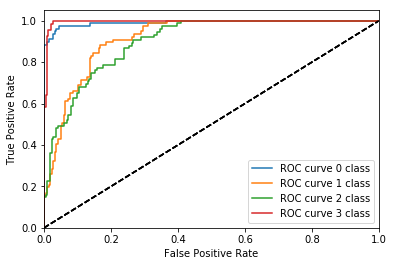

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define the best classifier with params found earlier.
lr_clf_best = LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000,
                                 C=grid.best_params_['classifier__C'], penalty=grid.best_params_['classifier__penalty'])

lr_clf_best.fit(X_train_scaled, y_train_enc)
predicted_proba = lr_clf_best.predict_proba(X_test_scaled)
predicted = lr_clf_best.predict(X_test_scaled)

print("Accuracy score:", accuracy_score(y_test_enc, predicted))
print("F1 score:", f1_score(y_test_enc, predicted, average='weighted'))

# Let's print roc curve for each class.

for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_enc, predicted_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label='ROC curve {} class'.format(i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

Комментарий: Я подсчитал над проскейленными данными.

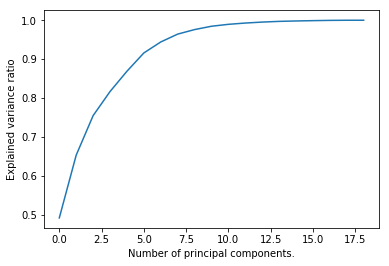

[0.49176523 0.65318807 0.75472996 0.81664702 0.86884418 0.91589415
 0.94411375 0.96433084 0.97596939 0.98456005 0.98947766 0.99281051
 0.99526482 0.99709975 0.99813455 0.99895606 0.99964638 0.99998078
 1.        ]


In [10]:
### YOUR CODE HERE

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
plt.plot(np.arange(X_train_scaled.shape[1]), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principal components.')
plt.ylabel('Explained variance ratio')
plt.show()
print(pca.explained_variance_ratio_.cumsum())

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [11]:
### YOUR CODE HERE

pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Используем $12$ компоненты, так коммулятивная сумма объяснённой дисперсии на них составит $0.99286544$. Далее каждая новая компонента даёт увеличение качества в третьем знаке. Я человек простой, а не какой-нибудь кагглер, - забиваю на точность после второго знака.

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [12]:
### YOUR CODE HERE

# Make a f1 scorer for multiclass problem.
scoring = make_scorer(f1_score, average='weighted')

#Define a classifier.
lr_clf_pca = LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000)

#Define params over which the GridSearchCV will be done.
params = {
    "classifier__C":np.linspace(0.1, 10, 10),
    "classifier__penalty": ['l1', 'l2']
}

# Make pipeline for preventing memory leak.
pipe_pca = Pipeline([
    ('classifier', lr_clf_pca)
])

# Make a GridSearchCV.
grid_pca = GridSearchCV(estimator=pipe_pca, param_grid=params, scoring=scoring, cv=5)
grid_pca.fit(X_train_pca, y_train_enc)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]), 'classifier__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [13]:
print("Best params:", grid_pca.best_params_)

Best params: {'classifier__C': 1.2000000000000002, 'classifier__penalty': 'l2'}


Accuracy score: 0.7542087542087542
F1 score: 0.7463638771944241


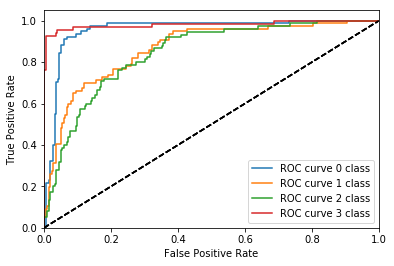

In [14]:
# Define the best classifier with params found earlier.
lr_clf_pca_best = LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000,
                                 C=grid_pca.best_params_['classifier__C'], penalty=grid_pca.best_params_['classifier__penalty'])

lr_clf_pca_best.fit(X_train_pca, y_train_enc)
predicted_proba_pca = lr_clf_pca_best.predict_proba(X_test_pca)
predicted_pca = lr_clf_pca_best.predict(X_test_pca)

print("Accuracy score:", accuracy_score(y_test_enc, predicted_pca))
print("F1 score:", f1_score(y_test_enc, predicted_pca, average='weighted'))

# Let's print roc curve for each class.
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_enc, predicted_proba_pca[:, i], pos_label=i)
    plt.plot(fpr, tpr, label='ROC curve {} class'.format(i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

#### Рассмотрим решающее дерево на начальных данных.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#Define a classifier.
dt_cl_initial = DecisionTreeClassifier()

#Define params over which the GridSearchCV will be done.
params = {
    "classifier__max_depth":np.arange(1, 15)
}

# Make pipeline for preventing memory leak.
pipe_dt_initial = Pipeline([
    ('classifier', dt_cl_initial)
])

# Make a GridSearchCV.
grid_dt_initial = GridSearchCV(estimator=pipe_dt_initial, param_grid=params, cv=5)
grid_dt_initial.fit(X_train, y_train_enc)

C:\Users\Ponom\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print("Best params:", grid_dt_initial.best_params_)

Best params: {'classifier__max_depth': 11}


Accuracy score: 0.7037037037037037
F1 score: 0.6969345848975478


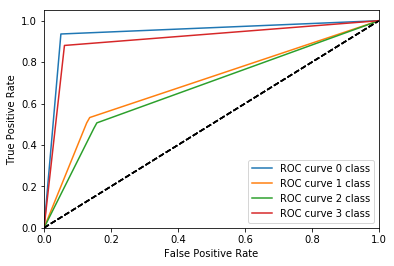

In [17]:
# Define the best classifier with params found earlier.
dt_cl_initial_best = DecisionTreeClassifier(max_depth=grid_dt_initial.best_params_['classifier__max_depth'])

dt_cl_initial_best.fit(X_train, y_train_enc)
predicted_proba_dt_initial = dt_cl_initial_best.predict_proba(X_test)
predicted_dt_initial = dt_cl_initial_best.predict(X_test)

print("Accuracy score:", accuracy_score(y_test_enc, predicted_dt_initial))
print("F1 score:", f1_score(y_test_enc, predicted_dt_initial, average='weighted'))

# Let's print roc curve for each class.
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_enc, predicted_proba_dt_initial[:, i], pos_label=i)
    plt.plot(fpr, tpr, label='ROC curve {} class'.format(i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

#### Рассмотрим решающее дерево на преобразованных данных.

In [18]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#Define a classifier.
dt_cl_pca = DecisionTreeClassifier()

#Define params over which the GridSearchCV will be done.
params = {
    "classifier__max_depth":np.arange(1, 15)
}

# Make pipeline for preventing memory leak.
pipe_dt_pca = Pipeline([
    ('classifier', dt_cl_pca)
])

# Make a GridSearchCV.
grid_dt_pca = GridSearchCV(estimator=pipe_dt_pca, param_grid=params, cv=5)
grid_dt_pca.fit(X_train_pca, y_train_enc)

C:\Users\Ponom\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print("Best params:", grid_dt_pca.best_params_)

Best params: {'classifier__max_depth': 9}


Accuracy score: 0.6094276094276094
F1 score: 0.6074727977967534


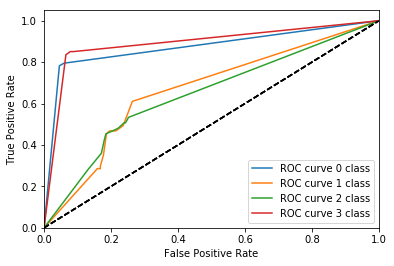

In [20]:
# Define the best classifier with params found earlier.
dt_cl_pca_best = DecisionTreeClassifier(max_depth=grid_dt_pca.best_params_['classifier__max_depth'])

dt_cl_pca_best.fit(X_train_pca, y_train_enc)
predicted_proba_dt_pca = dt_cl_pca_best.predict_proba(X_test_pca)
predicted_dt_pca = dt_cl_pca_best.predict(X_test_pca)

print("Accuracy score:", accuracy_score(y_test_enc, predicted_dt_pca))
print("F1 score:", f1_score(y_test_enc, predicted_dt_pca, average='weighted'))

# Let's print roc curve for each class.
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_enc, predicted_proba_dt_pca[:, i], pos_label=i)
    plt.plot(fpr, tpr, label='ROC curve {} class'.format(i))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

5
10
15
20
25
30
35
40
45
50


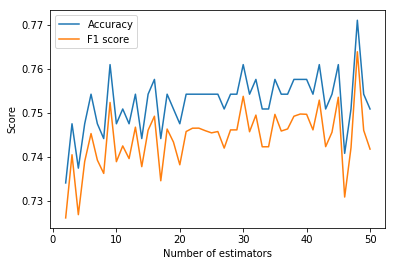

In [21]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

# Lists to store scores obtained.
lr_acc = []
lr_f1 = []
for num_est in range(2, 51):
    
    #The loop works to long. Let's add some interactivity!
    if num_est % 5 == 0:
        print(num_est)
        
    # As I understood, it is possible to use this very thing from skleran lib. 
    bagging = BaggingClassifier(LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000,
                                 C=grid_pca.best_params_['classifier__C'], penalty=grid_pca.best_params_['classifier__penalty']),
                            n_estimators=num_est, n_jobs=-1)
    bagging.fit(X_train_pca, y_train_enc)
    pred = bagging.predict(X_test_pca)
    lr_acc.append(accuracy_score(y_test_enc, pred))
    lr_f1.append(f1_score(y_test_enc, pred, average='weighted'))
                 
plt.plot(np.arange(2, 51), lr_acc, label="Accuracy")
plt.plot(np.arange(2, 51), lr_f1, label="F1 score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.legend()
plt.show()

График отражает какую-то рандомную зависимость. Скажу честно, на лабах по физике за такие графики домой отправляли... Судя по всему, стоит использовать примерно $15$ моделей, так как именно для этого числа f1 score и accuracy получились наибольшими. Полагаю, что параметры не будут оптимальными, так как тогда мы подогнались под одну выборку, а теперь (с помощью бутстрапа) подгоняемся под другие, наилучшие параметры для которых могут отличаться.

5
10
15
20
25
30
35
40
45
50


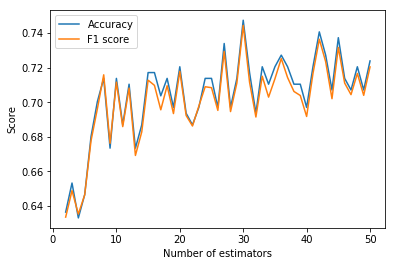

In [22]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier

# Lists to store scores obtained.
dt_acc = []
dt_f1 = []
for num_est in range(2, 51):
    
    #The loop works to long. Let's add some interactivity!
    if num_est % 5 == 0:
        print(num_est)
    
    # As I understood, it is possible to use this very thing from skleran lib. 
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=grid_dt_pca.best_params_['classifier__max_depth']),
                            n_estimators=num_est, n_jobs=-1)
    bagging.fit(X_train_pca, y_train_enc)
    pred = bagging.predict(X_test_pca)
    dt_acc.append(accuracy_score(y_test_enc, pred))
    dt_f1.append(f1_score(y_test_enc, pred, average='weighted'))
                 
plt.plot(np.arange(2, 51), dt_acc, label="Accuracy")
plt.plot(np.arange(2, 51), dt_f1, label="F1 score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.legend()
plt.show()

Победа! Зависимость менее рандомная. В целом, с большой натяжкой можно сказать, что с увеличением числа моделек, качество предсказания растёт. Я бы выбрал примерно $33$ модели, так как именно на них значения f1 score и accuracy максимальны.

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

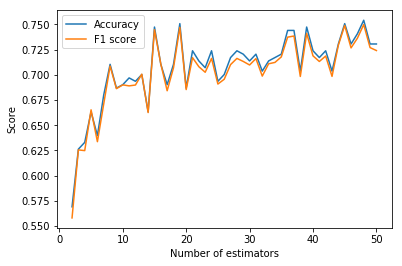

In [23]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

# Lists to store scores obtained.
rf_acc = []
rf_f1 = []
for num_est in range(2, 51):

    # As I understood, it is possible to use this very thing from skleran lib. 
    rf_class = RandomForestClassifier(n_estimators=num_est, n_jobs=-1)
    rf_class.fit(X_train_pca, y_train_enc)
    pred = rf_class.predict(X_test_pca)
    rf_acc.append(accuracy_score(y_test_enc, pred))
    rf_f1.append(f1_score(y_test_enc, pred, average='weighted'))
                 
plt.plot(np.arange(2, 51), rf_acc, label="Accuracy")
plt.plot(np.arange(2, 51), rf_f1, label="F1 score")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.legend()
plt.show()

Ещё одна победа! График получился наименее рандомный! Здесь видна в догосрочной перспективе тенденция увеличения качества предсказания с ростом количества деревьев в лесу. На мой взгляд, наилучших количеством деревьев получилось $37$. Это число довольно близко к тому, что мы получили в предыдущем пункте для деревьев, и довольно далеко отстоит от числа, полученного для LR.

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

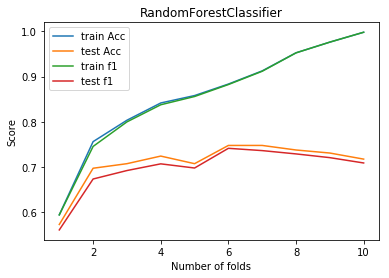

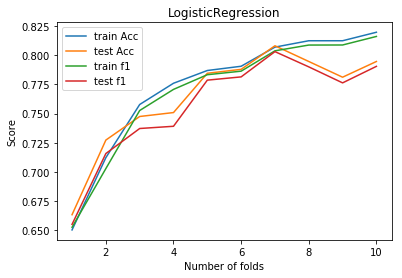

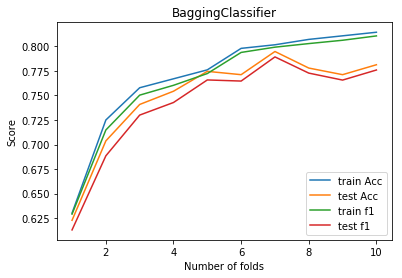

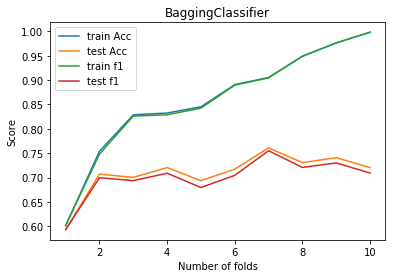

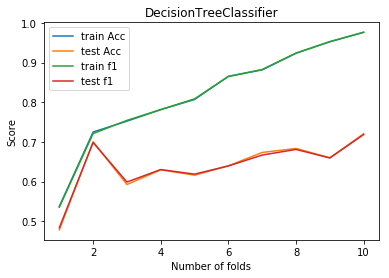

In [24]:
# YOUR CODE HERE

class Subarrays_cl():
    
    def __init__(self, X_train, y_train, X_test, y_test, estimator):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.estimator = estimator

    def fit_subarray(self, size):
        pipe_subarray = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', self.estimator)
        ])
        pipe_subarray.fit(self.X_train[:size], self.y_train[:size])
        pred_train = pipe_subarray.predict(self.X_train)
        pred_test = pipe_subarray.predict(self.X_test)
        return (accuracy_score(self.y_train, pred_train),
                accuracy_score(self.y_test, pred_test),
                f1_score(self.y_train, pred_train, average='weighted'),
                f1_score(self.y_test, pred_test, average='weighted'))
        
    def print_plot(self):
        X = [self.fit_subarray(min(X_train.shape[0] // 10 * i, X_train.shape[0])) for i in range(1, 11)]
        plt.title(str(self.estimator.__class__.__name__))
        plt.plot(np.arange(1, 11), list(map(lambda x: x[0], X)), label="train Acc")
        plt.plot(np.arange(1, 11), list(map(lambda x: x[1], X)), label="test Acc")
        plt.plot(np.arange(1, 11), list(map(lambda x: x[2], X)), label="train f1")
        plt.plot(np.arange(1, 11), list(map(lambda x: x[3], X)), label="test f1")
        plt.legend()
        plt.xlabel("Number of folds")
        plt.ylabel("Score")
        plt.show()

rf_subarrs = Subarrays_cl(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=37, n_jobs=-1))
rf_subarrs.print_plot()

lr_subarrs = Subarrays_cl(X_train, y_train, X_test, y_test, LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000,
                                 C=grid_pca.best_params_['classifier__C'], penalty=grid_pca.best_params_['classifier__penalty']))
lr_subarrs.print_plot()

bag_lr_subarrs = Subarrays_cl(X_train, y_train, X_test, y_test, BaggingClassifier(LogisticRegression(multi_class='multinomial', solver='saga', n_jobs=-1, max_iter=5000,
                                 C=grid_pca.best_params_['classifier__C'], penalty=grid_pca.best_params_['classifier__penalty']),
                            n_estimators=15, n_jobs=-1))
bag_lr_subarrs.print_plot()

bag_dt_subarrs = Subarrays_cl(X_train, y_train, X_test, y_test, BaggingClassifier(DecisionTreeClassifier(max_depth=grid_dt_pca.best_params_['classifier__max_depth']),
                            n_estimators=33, n_jobs=-1))
bag_dt_subarrs.print_plot()

dt_subarrs = Subarrays_cl(X_train, y_train, X_test, y_test, DecisionTreeClassifier(max_depth=
                                                                                   grid_dt_initial.best_params_['classifier__max_depth']))
dt_subarrs.print_plot()    

Во-первых, видно, что в конце точность на train выше, чем на test, так как именно под эти данные мы и подогнались. Во-вторых, видно, что с увелчение объёма данных для обучения точность в большинстве случаев возрастает, так как модель начинает улавливать больше различных паттернов 3) что ты мне сделаешь, я в другмо городе))0))0))00))))0)))))))

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.